In [3]:
#TASK1
#Read the dataset from the below link
#https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_
#Names/US_Baby_Names_right.csv

import numpy as np
import pandas as pd
import os
url="https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv"
data=pd.read_csv(url)  #read csv file from url
data.head()            #returns the first n rows ,default value n= 5

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41


In [4]:
#1. Delete unnamed columns

data.drop("Unnamed: 0",axis=1,inplace=True) #Remove rows or columns by specifying label names and corresponding axis
data.head()

,Id,Name,Year,Gender,State,Count
0,11350,Emma,2004,F,AK,62
1,11351,Madison,2004,F,AK,48
2,11352,Hannah,2004,F,AK,46
3,11353,Grace,2004,F,AK,44
4,11354,Emily,2004,F,AK,41


Gender
F    558846
M    457549
Name: Count, dtype: int64


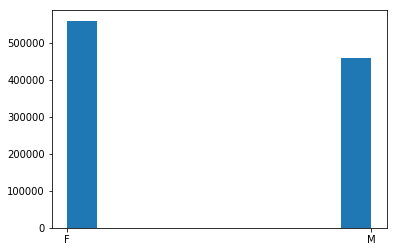

In [6]:
#2. Show the distribution of male and female

import matplotlib.pyplot as plt

maleAndFemalCount = data.groupby('Gender').count()['Count']
print(maleAndFemalCount)

plt.hist(data.Gender) #histogram plot
plt.show()

In [7]:
#3. Show the top 5 most preferred names

df = data.groupby(data.Name)['Name'].agg(pd.DataFrame(
    {"count": len},index=[])).sort_values(
    "count", ascending=False).head().reset_index()
print(df)

,Name,count
0,Riley,1112
1,Avery,1080
2,Jordan,1073
3,Peyton,1064
4,Hayden,1049


In [26]:
#4. What is the median name occurence in the dataset

print("the median name occurance is : ")
print(data.sort_values('Name').iloc[[508198]]['Name'])


 the median name occurance is : 
426479    Jocelyn
Name: Name, dtype: object


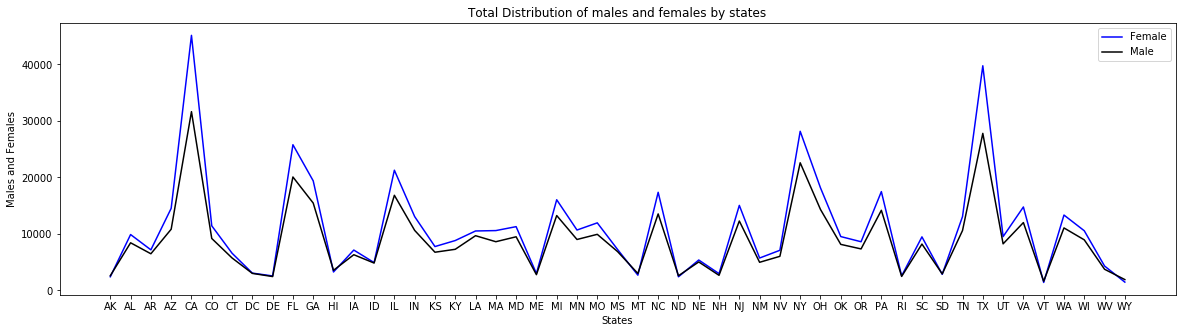

In [9]:
#5. Distribution of male and female born count by states

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
ind=data.groupby("State").count()

df1=data[data["Gender"]=="F"].groupby('State').count()
df2=data[data["Gender"]=="M"].groupby("State").count()
x=ind.index
y1=df1["Gender"]
y2=df2["Gender"]
plt.figure(figsize=(20,5))
plt.plot(x,y1,'Blue',label="Female")
plt.plot(x,y2,'Black',label="Male")
plt.xlabel("States")
plt.ylabel("Males and Females")
plt.title("Total Distribution of males and females by states")
plt.legend()
plt.show()

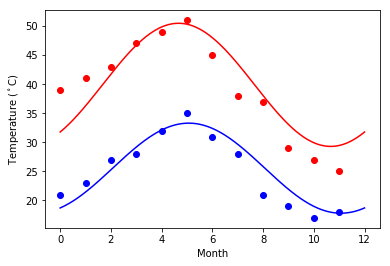

In [12]:
#TASK 2
#We have the min and max temperatures in a city In India for each months of the year. We
#would like to find a function to describe this and show it graphically, the dataset given below.
#Task:
#1. fitting it to the periodic function
#2. plot the fit

import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

temp_max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
temp_min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])
months = np.arange(12)

def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                      temp_max, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,
                                      temp_min, [-40, 20, 0])

days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, temp_max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, temp_min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()